# Testing DeepSeek's ability to generate data sets

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import re

In [55]:
dsDF = pd.read_csv("../LLM_Generated/DeepSeek/10Countries.csv")
compDF = pd.read_csv("../completeDatasets/pricesComplete.csv")

In [56]:
# dsDF.info()
# compDF.info()

dsDF["university"] = dsDF['university'].str.replace(r"\s*\(.*\)", "", regex=True)
for col in ["acceptanceRate", "percOfIntStud"]:
    dsDF[col] = dsDF[col].str.replace('%', '', regex=False).astype(float)

merged_df = dsDF.merge(compDF, on="university", suffixes=("_df1", "_df2"))
regressor = LinearRegression()
r2_scores = {}

,university,ranking,tuition,percOfIntStud,acceptanceRate,safetyIndex,livingCost,rentCost,groceriesCost,recreationCost,...,Computer Science,Business,Economics,Psychology,Biology,Law,Medicine,Mathematics,Art,Physics
0,University of Zagreb,800,2000,10.0,50.0,75,600,300,200,80,...,1,1,1,1,1,1,1,1,1,1
1,University of Vienna,150,1500,25.0,40.0,80,900,600,250,100,...,1,1,1,1,1,1,1,1,1,1
2,Technical University of Munich,50,3000,30.0,8.0,85,900,700,200,100,...,1,1,1,1,1,1,1,1,1,1
3,KU Leuven,80,4000,35.0,50.0,85,900,600,250,100,...,1,1,1,1,1,1,1,1,1,1
4,The University of Melbourne,41,25000,48.0,70.0,85,1200,800,300,150,...,1,1,1,1,1,1,1,1,1,1


## Ranking

Column: ranking
  Slope: 0.5607
  Intercept: 69.4567
  R² Score: 0.4940



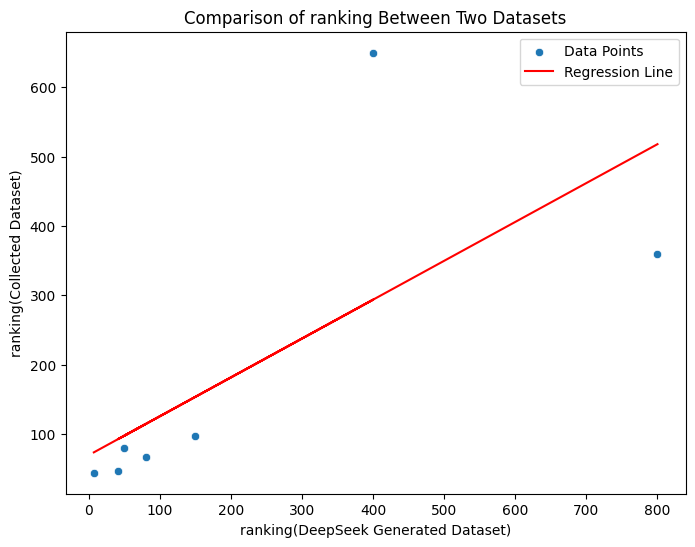

In [59]:
column = "ranking"

X = merged_df[[column + '_df1']].values
y = merged_df[column + '_df2'].values

regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
columnX = column + "_df1"
columnY = column + "_df2"
sns.scatterplot(x=merged_df[columnX], y=merged_df[columnY], label='Data Points')
plt.plot(merged_df[columnX], y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Tuition

Column: tuition
  Slope: 0.2648
  Intercept: 2566.7961
  R² Score: 0.7762



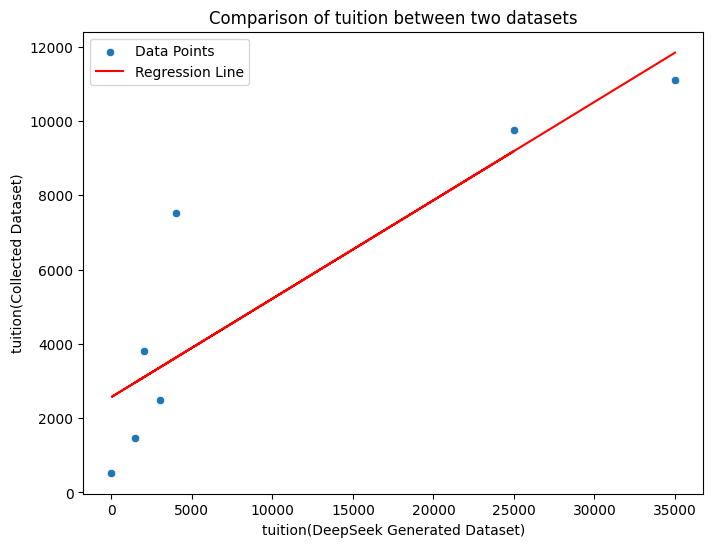

In [60]:
column = "tuition"

X = merged_df[[column + '_df1']].values
y = merged_df[column + '_df2'].values

regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
columnX = column + "_df1"
columnY = column + "_df2"
sns.scatterplot(x=merged_df[columnX], y=merged_df[columnY], label='Data Points')
plt.plot(merged_df[columnX], y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Percentage of internation students

Column: percOfIntStud
  Slope: 0.8212
  Intercept: 3.4114
  R² Score: 0.6392



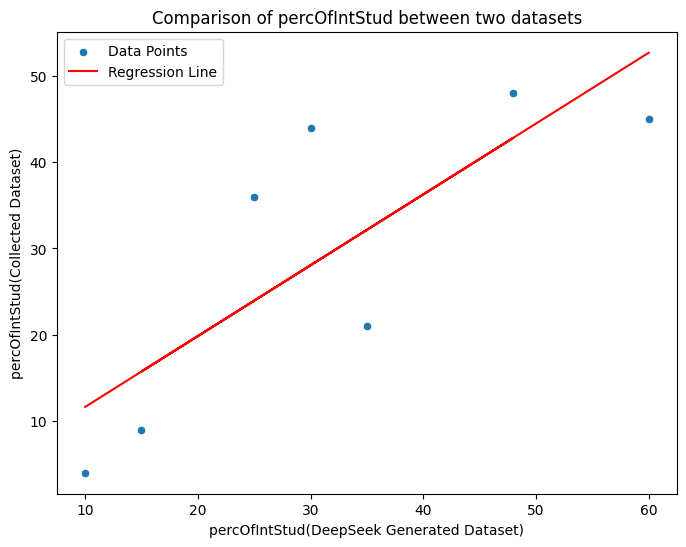

In [61]:
column = "percOfIntStud"

X = merged_df[[column + '_df1']].values
y = merged_df[column + '_df2'].values

regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
columnX = column + "_df1"
columnY = column + "_df2"
sns.scatterplot(x=merged_df[columnX], y=merged_df[columnY], label='Data Points')
plt.plot(merged_df[columnX], y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Acceptance rate

Column: acceptanceRate
  Slope: 0.5971
  Intercept: 28.3763
  R² Score: 0.3426



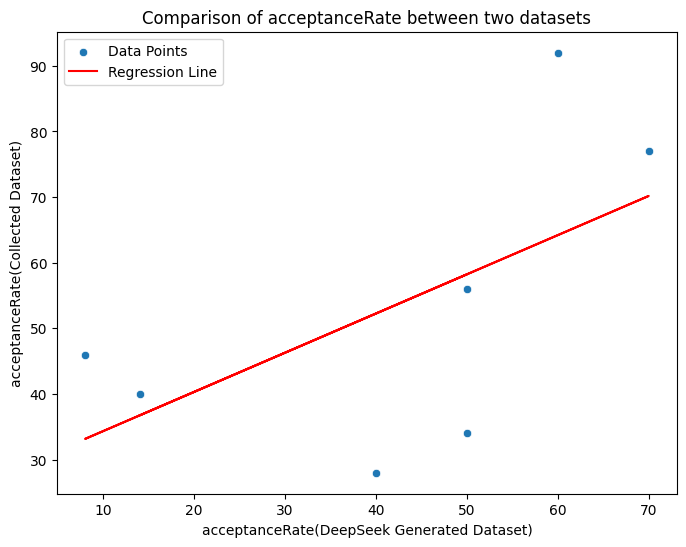

In [63]:
column = "acceptanceRate"

X = merged_df[[column + '_df1']].values
y = merged_df[column + '_df2'].values

regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
columnX = column + "_df1"
columnY = column + "_df2"
sns.scatterplot(x=merged_df[columnX], y=merged_df[columnY], label='Data Points')
plt.plot(merged_df[columnX], y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Cost of living

Column: livingCost
  Slope: 0.3250
  Intercept: 701.3447
  R² Score: 0.2636



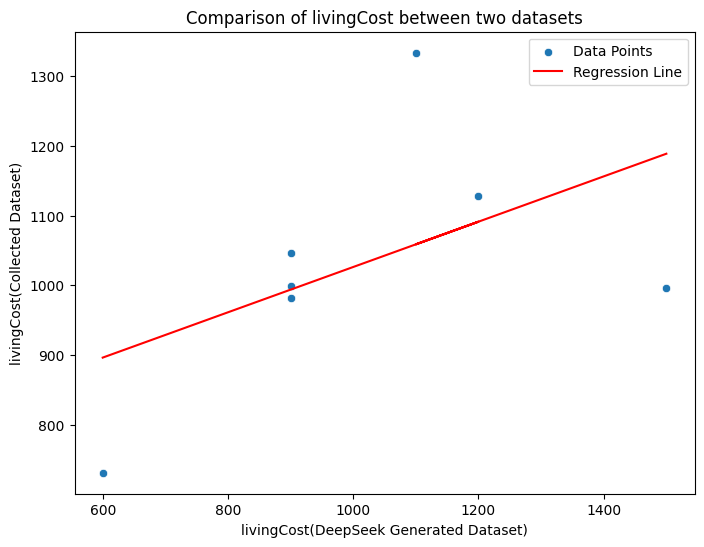

In [65]:
column = "livingCost"

X = merged_df[[column + '_df1']].values
y = merged_df[column + '_df2'].values

regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
columnX = column + "_df1"
columnY = column + "_df2"
sns.scatterplot(x=merged_df[columnX], y=merged_df[columnY], label='Data Points')
plt.plot(merged_df[columnX], y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Cost of rent

Column: rentCost
  Slope: 0.8882
  Intercept: 375.8561
  R² Score: 0.5322



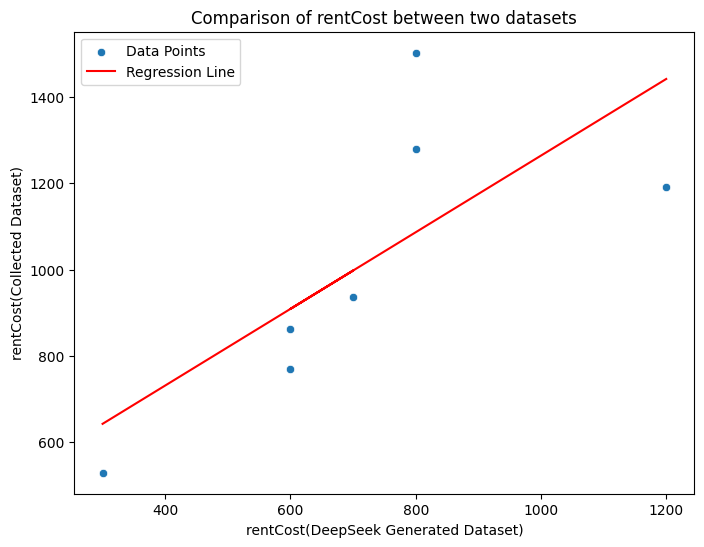

In [66]:
column = "rentCost"

X = merged_df[[column + '_df1']].values
y = merged_df[column + '_df2'].values

regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
columnX = column + "_df1"
columnY = column + "_df2"
sns.scatterplot(x=merged_df[columnX], y=merged_df[columnY], label='Data Points')
plt.plot(merged_df[columnX], y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Cost of groceries

Column: groceriesCost
  Slope: 1.2121
  Intercept: 39.9706
  R² Score: 0.4602



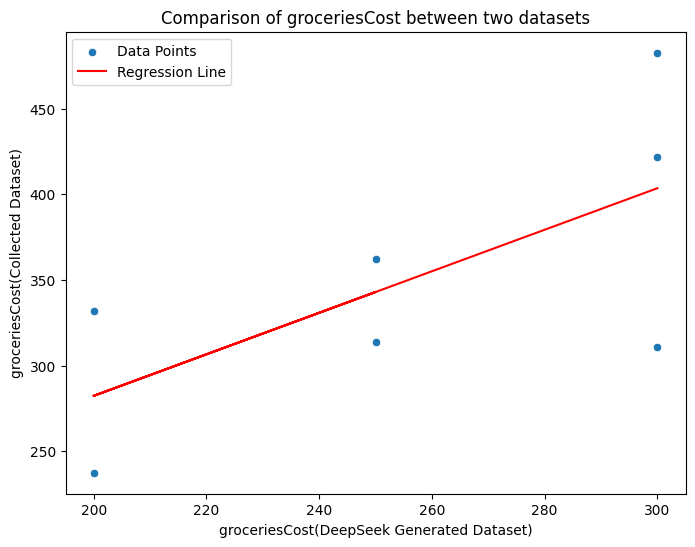

In [67]:
column = "groceriesCost"

X = merged_df[[column + '_df1']].values
y = merged_df[column + '_df2'].values

regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
columnX = column + "_df1"
columnY = column + "_df2"
sns.scatterplot(x=merged_df[columnX], y=merged_df[columnY], label='Data Points')
plt.plot(merged_df[columnX], y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Cost of recreation

Column: recreationCost
  Slope: 0.5506
  Intercept: 20.4288
  R² Score: 0.5674



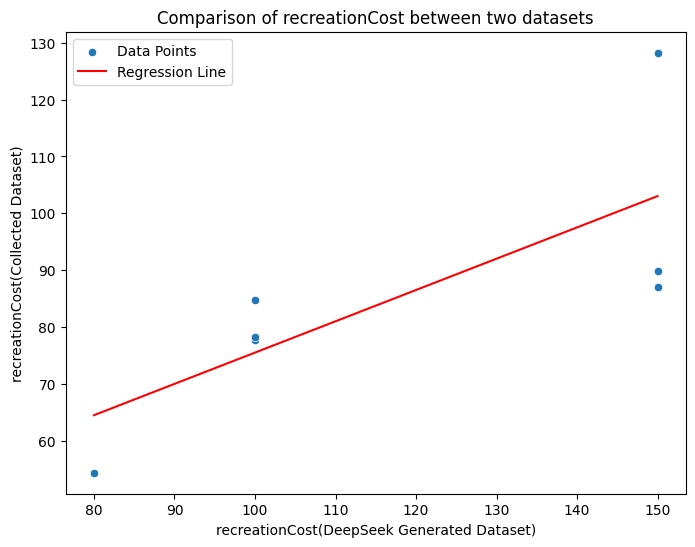

In [68]:
column = "recreationCost"

X = merged_df[[column + '_df1']].values
y = merged_df[column + '_df2'].values

regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
columnX = column + "_df1"
columnY = column + "_df2"
sns.scatterplot(x=merged_df[columnX], y=merged_df[columnY], label='Data Points')
plt.plot(merged_df[columnX], y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Healthcare cost

Column: healthcareCost
  Slope: 1.0790
  Intercept: 489.9229
  R² Score: 0.1769



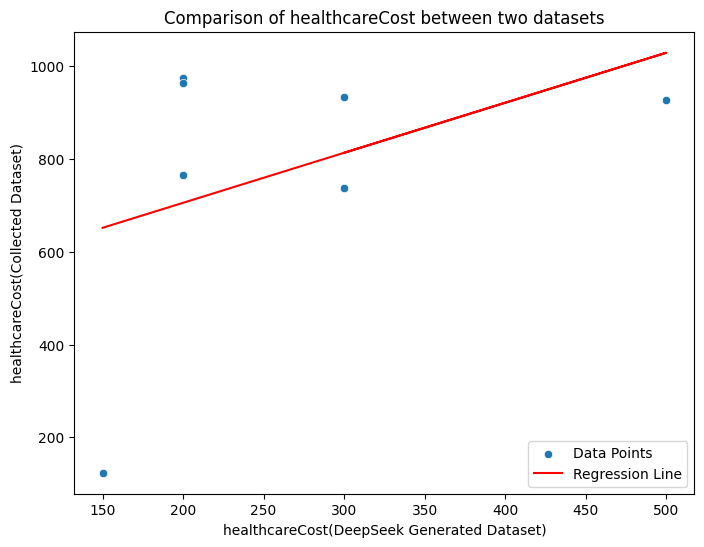

In [70]:
column = "healthcareCost"

X = merged_df[[column + '_df1']].values
y = merged_df[column + '_df2'].values

regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
columnX = column + "_df1"
columnY = column + "_df2"
sns.scatterplot(x=merged_df[columnX], y=merged_df[columnY], label='Data Points')
plt.plot(merged_df[columnX], y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Cost of transportation

Column: transportCost
  Slope: 0.8623
  Intercept: 22.7427
  R² Score: 0.6342



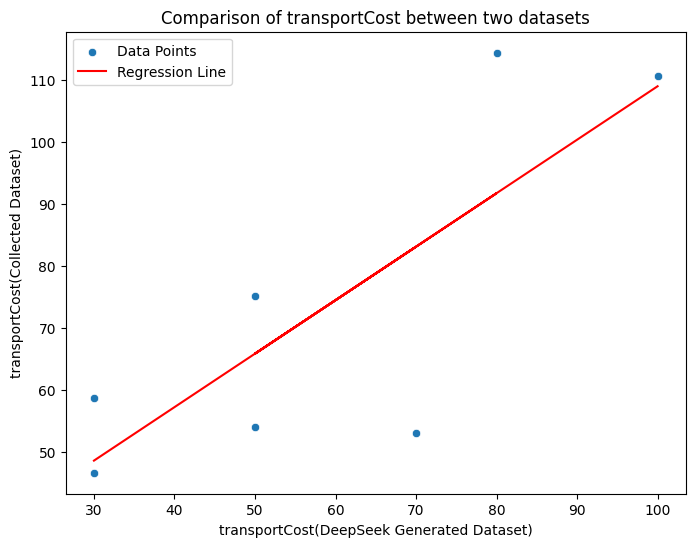

In [71]:
column = "transportCost"

X = merged_df[[column + '_df1']].values
y = merged_df[column + '_df2'].values

regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
columnX = column + "_df1"
columnY = column + "_df2"
sns.scatterplot(x=merged_df[columnX], y=merged_df[columnY], label='Data Points')
plt.plot(merged_df[columnX], y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()